### データを正規化した時、標準化した時、そのままの時で、
### 分析結果が変わるかどうかを確認する

In [27]:
import numpy as np

RANDOM_SEED=71

In [62]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# データの標準化処理
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X)

# データの正規化処理
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X_train_ms = ms.fit_transform(data)

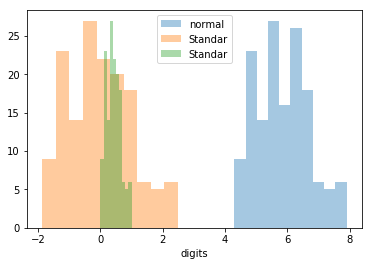

In [41]:
import matplotlib.pyplot as plt
plt.hist(X[:,0], bins=10, alpha=0.4, label='normal')
plt.hist(X_train_std[:,0], bins=10, alpha=0.4, label='Standar')
plt.hist(X_train_ms[:,0], bins=10, alpha=0.4, label='Standar')
plt.xlabel('digits')
plt.legend()
plt.show()

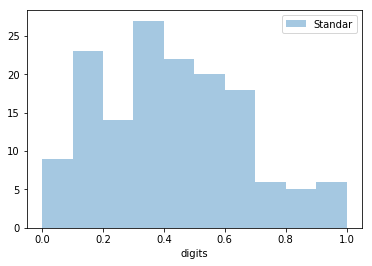

In [42]:
# 正規化グラフ
import matplotlib.pyplot as plt
plt.hist(X_train_ms[:,0], bins=10, alpha=0.4, label='Standar')
plt.xlabel('digits')
plt.legend()
plt.show()

In [44]:
# 以下の３種のデータに対して、分離をする
import pandas as pd

df_X = pd.DataFrame(X)
df_X_std = pd.DataFrame(X_train_std)
df_X_ms = pd.DataFrame(X_train_ms)

#データの件数や統計量を確認
df_X.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
#データの件数や統計量を確認
df_X_std.describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.637024e-15,-1.482518e-15,-1.623146e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [46]:
#データの件数や統計量を確認
df_X_ms.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


# ４次元データのSVCの精度を確認

In [79]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# トレーニングデータとテストデータに分割。
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=RANDOM_SEED)

# SVMのインスタンスを生成
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=RANDOM_SEED) # 線形SVM
model = svc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print('Accuracy: %.5f' % accuracy_score(y_test,y_pred))



Accuracy: 0.97778


In [78]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# データの標準化処理
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

# トレーニングデータとテストデータに分割。
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.3, stratify=y, random_state=RANDOM_SEED)

# SVMのインスタンスを生成
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=RANDOM_SEED) # 線形SVM
model = svc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print('Accuracy: %.5f' % accuracy_score(y_test,y_pred))


Accuracy: 0.97778


In [81]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# データの正規化処理
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X_ms = ms.fit_transform(X)

# トレーニングデータとテストデータに分割。
X_train, X_test, y_train, y_test = train_test_split(
    X_ms, y, test_size=0.3, stratify=y, random_state=RANDOM_SEED)

# SVMのインスタンスを生成
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=RANDOM_SEED) # 線形SVM
model = svc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print('Accuracy: %.5f' % accuracy_score(y_test,y_pred))

Accuracy: 0.91111


# 主成分分析で可視化する

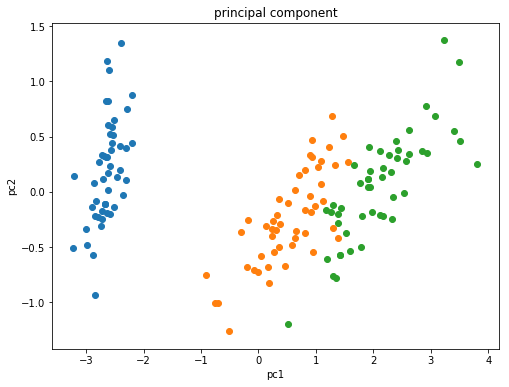

In [47]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X)
transformed = pca.transform(X)

fig = plt.figure(figsize=(8, 6))

# 主成分をプロットする
for label in np.unique(iris.target):
    plt.scatter(transformed[iris.target == label, 0],
                transformed[iris.target == label, 1])
plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')

plt.show()

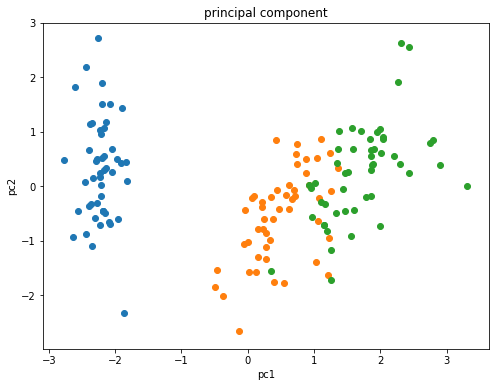

In [49]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X_train_std)
transformed = pca.transform(X_train_std)

fig = plt.figure(figsize=(8, 6))

# 主成分をプロットする
for label in np.unique(iris.target):
    plt.scatter(transformed[iris.target == label, 0],
                transformed[iris.target == label, 1])
plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')

plt.show()

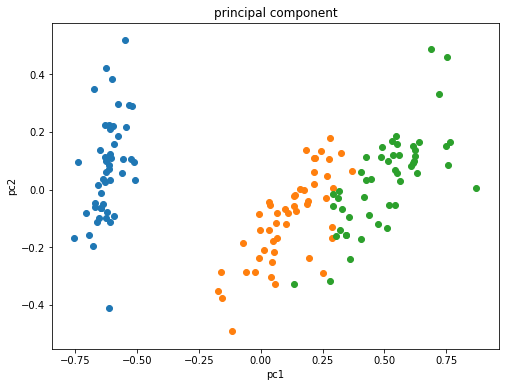

In [50]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X_train_ms)
transformed = pca.transform(X_train_ms)

fig = plt.figure(figsize=(8, 6))

# 主成分をプロットする
for label in np.unique(iris.target):
    plt.scatter(transformed[iris.target == label, 0],
                transformed[iris.target == label, 1])
plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')

plt.show()

Accuracy: 0.93


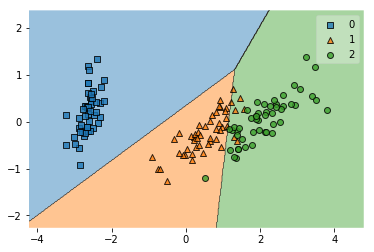

In [71]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
iris = datasets.load_iris()
X = iris.data
y = iris.target
pca.fit(X)
transformed = pca.transform(X)

# トレーニングデータとテストデータに分割。
X_train, X_test, y_train, y_test = train_test_split(
    transformed, y, test_size=0.3, stratify=y, random_state=RANDOM_SEED)

# SVMのインスタンスを生成
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=RANDOM_SEED) # 線形SVM
model = svc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(transformed, iris.target, clf=model,  res=0.02)

Accuracy: 0.87


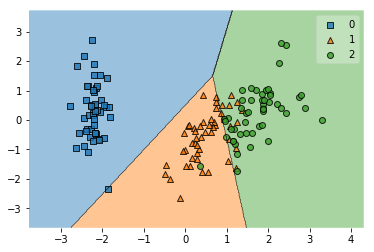

In [74]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X_train_std)
transformed = pca.transform(X_train_std)

# トレーニングデータとテストデータに分割。
X_train, X_test, y_train, y_test = train_test_split(
    transformed, y, test_size=0.3, stratify=y, random_state=RANDOM_SEED)

# SVMのインスタンスを生成
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=RANDOM_SEED) # 線形SVM
model = svc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(transformed, iris.target, clf=model,  res=0.02)

Accuracy: 0.87


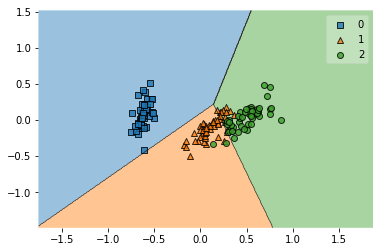

In [75]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X_train_ms)
transformed = pca.transform(X_train_ms)

# トレーニングデータとテストデータに分割。
X_train, X_test, y_train, y_test = train_test_split(
    transformed, y, test_size=0.3, stratify=y, random_state=RANDOM_SEED)

# SVMのインスタンスを生成
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=RANDOM_SEED) # 線形SVM
model = svc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(transformed, iris.target, clf=model,  res=0.02)

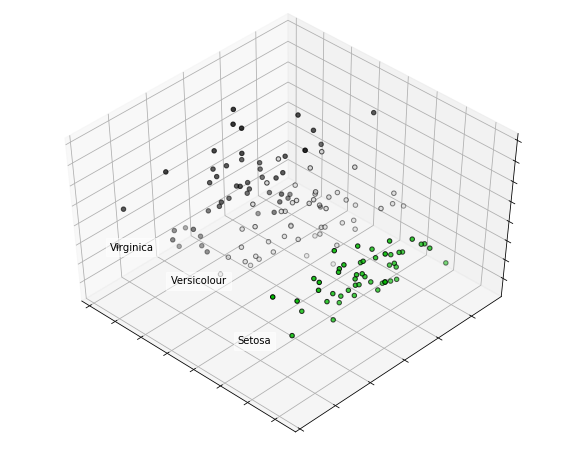

In [56]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()


for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

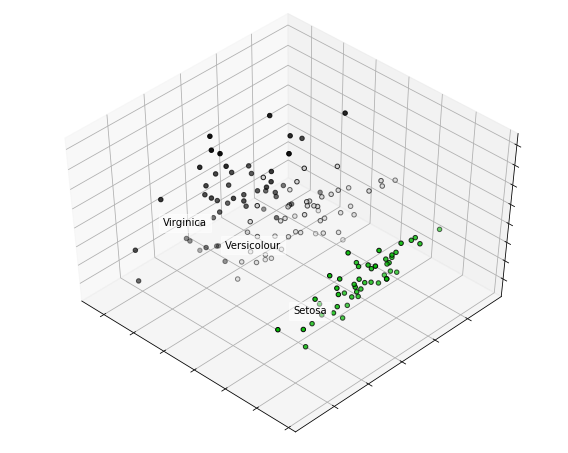

In [63]:
pca = decomposition.PCA(n_components=3)
pca.fit(X_train_std)
X = pca.transform(X_train_std)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()


for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

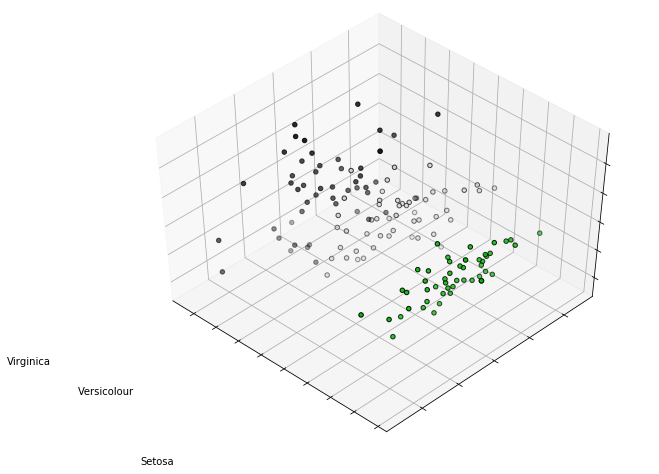

In [60]:
pca = decomposition.PCA(n_components=3)
pca.fit(X_train_ms)
X = pca.transform(X_train_ms)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()


for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()